<a href="https://colab.research.google.com/github/yohanesnuwara/pyreservoir/blob/master/notebooks/oil_mbal_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://github.com/yohanesnuwara/pyreservoir

Cloning into 'pyreservoir'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 508 (delta 26), reused 0 (delta 0), pack-reused 460
Receiving objects: 100% (508/508), 782.03 KiB | 6.21 MiB/s, done.
Resolving deltas: 100% (268/268), done.


In [3]:
import sys
sys.path.append('/content/pyreservoir/pvt')
sys.path.append('/content/pyreservoir/matbal')

from pvtcorrelation import gas_fvf
from mbal import oil

## Valhall Field (undersaturated non-volatile)

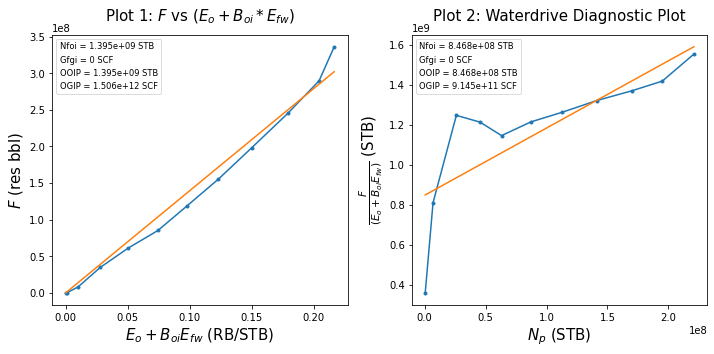

In [5]:
import warnings
warnings.filterwarnings("ignore")

temp = 195 # Initial reservoir temperature, F
swi = 0.2 # Initial water saturation
cw = 3E-6 # Water compressibility, sip
cf = 50E-6 # Formation compressibility, sip

# load production data of Valhall field
columns = ['date', 'z', 'p', 'Np', 'Rp', 'Wp', 'Wi', 'Bo', 'Rs']
df = pd.read_csv('/content/pyreservoir/data/valhall_proddata.csv', names=columns)

# convert date column to datetime format
df['date'] =  pd.to_datetime(df['date'], format='%d %B %Y')

# define input variables
t = df['date'].values
z = df['z'].values
p = df['p'].values
Np = df['Np'].values * 1E+6 # convert to STB
Rp = df['Rp'].values
Wp = df['Wp'].values
Wi = df['Wi'].values
Bo = df['Bo'].values
Rs = df['Rs'].values

# calculate Gp using Rp and Np
Gp = Rp * Np 

# no injection, define Gi as zeros
Gi = np.zeros(len(df))

# because non-volatile, add Rv data as zeros
Rv = np.zeros(len(df))
df['Rv'] = Rv

# calculate Bg from z-factor
Bg = gas_fvf(z, temp, p)
Bg = Bg * 0.18 # convert res ft3/scf to RB/scf
df['Bg'] = Bg

# initialize with reservoir type: oil
type = oil()

# calculate MBAL parameters
F, Bto, Btg, Efw, Eo, Eg = oil.calculate_params(type, p, Bo, Bg, Rv, Rs, Np, Gp, 
                                                Gi, cf, cw, swi)

# display material balance plots
oil.plot(type, 'undersaturated', F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv)

## Prudhoe Bay, Alaska

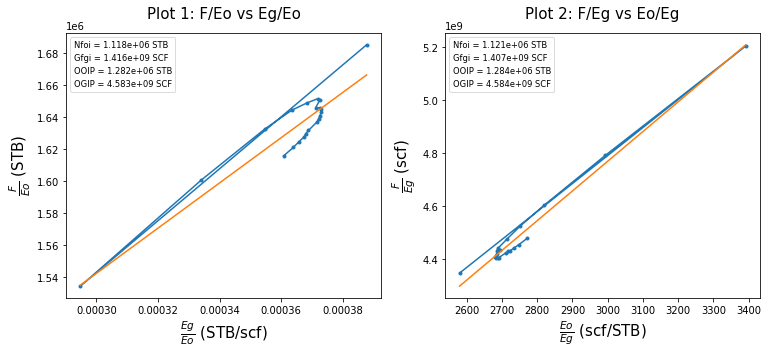

In [6]:
swi = 0 # Initial water saturation, not known
cw = 0 # Water compressibility, not known
cf = 0 # Formation compressibility, not known

# load production data of Prudhoe Bay
columns = ['p', 'Bo', 'Bg', 'Rs', 'Rv', 'Np', 'Gp']
df = pd.read_csv('/content/pyreservoir/data/Table 12.16 (edited).csv', names=columns)

# define input variables
p = df['p'].values
Bo = df['Bo'].values 
Bg = df['Bg'].values * (1 / 1E+3) # convert RB/MSCF to RB/SCF
Rs = df['Rs'].values
Rv = df['Rv'].values * (1 / 1E+6) # convert STB/MMSCF to STB/SCF
Np = df['Np'].values / 100
Gp = df['Gp'].values / 100

Gi = np.zeros(len(df)) # no gas injection

# initialize with reservoir type: oil
type = oil()

# calculate MBAL parameters
F, Bto, Btg, Efw, Eo, Eg = oil.calculate_params(type, p, Bo, Bg, Rv, Rs, Np, Gp, 
                                                Gi, cf, cw, swi)

# display material balance plots
oil.plot(type, 'saturated', F, Bto, Btg, Efw, Eo, Eg, Np, Bo, Rs, Rv, figsize=(16,5))